# Experiment1_Random_Forest

Any player who has never competed in an NBA game prior to that year is considered a rookie in the league. The NBA presents the NBA Rookie of the Year Award to the top rookie at the conclusion of the regular season.A basketball player's transition to the NBA is a significant event. The beginning of their careers is something that sports analysts and fans eagerly anticipate to monitor and predict how they will perform in the future.This notebook will use ensemble method and MLP to predict whether or not a player will last five years in the league based on his stats.

The steps are:
1. Launch Docker image
2. Load and Explore data
3. Train Classifiers
4. Evaluation
5. Feature importance
6. Prediction
7. Push changes

In [1]:
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg') 
%matplotlib inline
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 1. Launch Docker image

**[1.1]** Go to the folder I created previously `adv_dsi_ass_1`

In [3]:
cd /Users/frodo/Downloads/36120/Project/ass_1/

[Errno 2] No such file or directory: '/Users/frodo/Downloads/36120/Project/ass_1/'
/Users/frodo/Downloads/36120


**[1.2]** Run the built Docker image

In [ ]:
docker run  -dit --rm --name adv_ass1 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/ass_1/experiment_1:/home/jovyan/work -v ~/Projects/ass_1/.aws:/home/jovyan/.aws -v ~/Projects/ass_1/src:/home/jovyan/work/src classification-notebook:latest 

**[1.3]** Display last 50 lines of logs

In [ ]:
docker logs --tail 50 ass_1

**[1.4]** Create a new git branch called `first_experiment`

In [ ]:
git checkout -b first_experiment

## 2. Load and explore data

We will do data cleaning and data exploration simultaneously because data exploration often goes hand in hand with data cleaning processes in our experiment

In [3]:
df = pd.read_csv('data/raw/beer_reviews.csv')

In [4]:
# Load the data and get the DataFrame and target variable
df, y = loader.load_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = loader.data_split()

### Display the first 5 rows of train data

In [5]:
X_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
Id,,,,,,,,,,,,,,,,,,,
4398,66,34.1,13.4,5.3,11.6,46.6,0.9,2.6,24.8,1.7,2.2,77.7,0.5,2.5,2.8,3.7,1.6,0.1,2.4
11560,57,18.5,10.2,3.8,7.8,48.2,0.1,0.5,38.6,2.5,3.3,75.5,1.6,1.4,2.7,3.2,1.9,0.2,1.2
5621,37,13.5,2.7,1.0,2.8,35.3,0.8,2.6,43.4,0.3,0.4,68.5,0.1,0.8,1.1,1.5,0.7,-0.1,0.5
11269,57,19.7,6.0,2.3,5.6,41.6,0.1,0.4,13.4,1.2,1.4,81.3,0.9,2.6,3.2,2.2,0.5,0.4,1.4
9323,78,11.4,5.5,2.1,5.4,38.3,0.3,1.1,19.7,0.7,1.0,77.1,0.1,0.5,0.6,3.3,0.9,-15.7,1.3


### Display the shape of train data

In [6]:
X_train.shape

(6400, 19)

There are 8000 observations with 20 features,and there is no missing value in train dataset

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 4398 to 5398
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       6400 non-null   int64  
 1   MIN      6400 non-null   float64
 2   PTS      6400 non-null   float64
 3   FGM      6400 non-null   float64
 4   FGA      6400 non-null   float64
 5   FG%      6400 non-null   float64
 6   3P Made  6400 non-null   float64
 7   3PA      6400 non-null   float64
 8   3P%      6400 non-null   float64
 9   FTM      6400 non-null   float64
 10  FTA      6400 non-null   float64
 11  FT%      6400 non-null   float64
 12  OREB     6400 non-null   float64
 13  DREB     6400 non-null   float64
 14  REB      6400 non-null   float64
 15  AST      6400 non-null   float64
 16  STL      6400 non-null   float64
 17  BLK      6400 non-null   float64
 18  TOV      6400 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 1000.0 KB


In [8]:
X_train.isna().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
dtype: bool

In [9]:
X_train.isnull().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
dtype: bool

### Description of data

In [10]:
X_train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.00000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,62.893281,18.567750,7.246797,2.798437,6.213375,44.601250,0.264516,0.815094,19.544703,1.38850,1.943422,71.305531,1.077063,2.171969,3.247453,1.621313,0.650047,0.241875,1.256375
std,17.126229,8.898833,4.285541,1.679960,3.556203,6.125671,0.384752,1.062505,16.058255,0.91972,1.239594,10.423423,0.779683,1.379342,2.067040,1.362032,0.409841,0.807298,0.720395
min,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.00000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000
25%,52.000000,12.000000,4.100000,1.500000,3.600000,40.400000,0.000000,0.100000,8.300000,0.70000,1.000000,65.100000,0.500000,1.100000,1.700000,0.600000,0.300000,0.100000,0.700000
50%,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.20000,1.700000,71.300000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,74.000000,23.525000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.425000,1.90000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000
max,123.000000,73.800000,34.200000,13.100000,28.900000,65.300000,1.600000,4.400000,82.100000,7.60000,9.600000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,15.100000,5.200000


We can see there are some negative values in our dataset, but negative values are usually not present in this case, we may handle this problem in the data preprocess step

### Distribution of Y

In [11]:
y_train.value_counts()

1    5335
0    1065
Name: TARGET_5Yrs, dtype: int64

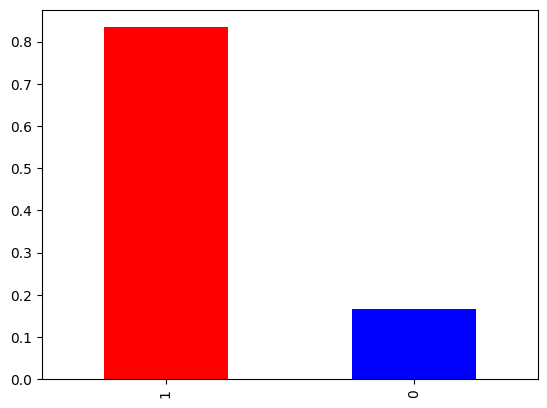

In [12]:
# Calculate positive and negative sample ratios
sizes = y_train.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])

### Correlation matrix

In [13]:
#Correlation matrix
corr_matrix = X_train.corr()

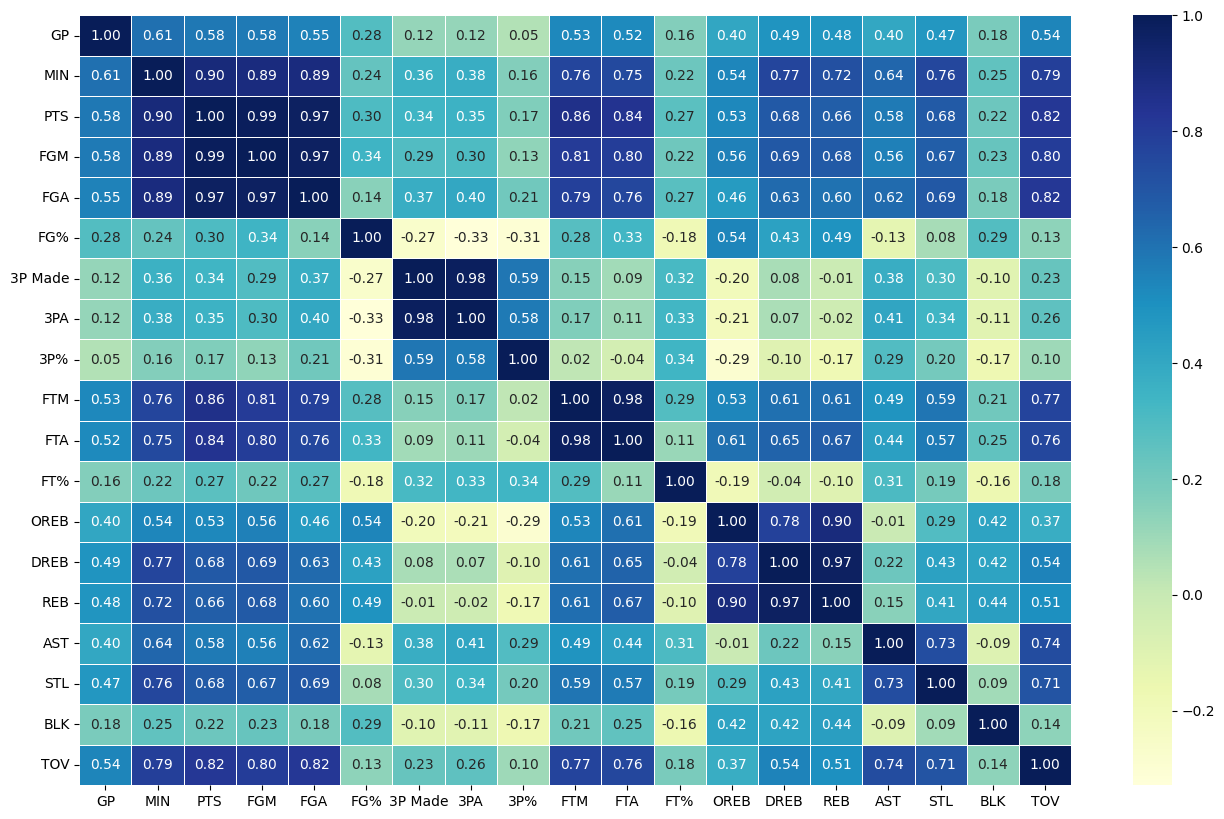

In [14]:
#plot heatmap
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

## 3. Train model

### Train model by Random Search

we generate a custompreprocessor ensure there is no negative value in our train dataset

In [19]:
from src.trainers.complex_trainers import ModelSelector

model_selector = ModelSelector()
sorted_results = model_selector.select_model(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest: Best score = 0.6864386569337927, Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_depth': 10}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
LightGBM: Best score = 0.6908690506047845, Best Params: {'model__reg_lambda': 0, 'model__reg_alpha': 0, 'model__n_estimators': 200, 'model__max_depth': None, 'model__learning_rate': 0.01}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

/Users/frodo/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature nam

MLP: Best score = 0.6889792362421954, Best Params: {'model__solver': 'adam', 'model__learning_rate_init': 0.01, 'model__hidden_layer_sizes': (100, 50), 'model__alpha': 0.01, 'model__activation': 'relu'}


X does not have valid feature names, but MLPClassifier was fitted with feature names


## 4. Evaluation on test data

we applied the trained model on test data to obtain model performance 

In [20]:
model = sorted_results[0]['best_model']

In [22]:
from src.evaluation.evaluation import Evaluator

evaluator = Evaluator()
accuracy, roc_auc = evaluator.evaluate(model, X_test, y_test)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.01      0.02       266
           1       0.83      0.99      0.91      1334

    accuracy                           0.83      1600
   macro avg       0.57      0.50      0.46      1600
weighted avg       0.75      0.83      0.76      1600

Confusion Matrix:
 [[   3  263]
 [   7 1327]]
ROC AUC Score: 0.7021761675553201
Accuracy: 0.83125
ROC AUC: 0.7021761675553201


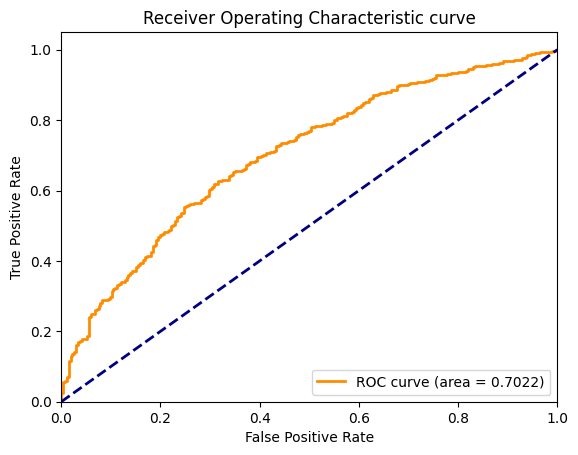

[CV] END model__max_depth=10, model__min_samples_split=5, model__n_estimators=200; total time=   1.6s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   0.9s
[CV] END model__max_depth=20, model__min_samples_split=5, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=500; total time=   3.5s
[CV] END model__max_depth=10, model__min_samples_split=5, model__n_estimators=100; total time=   0.7s
[CV] END model__max_depth=20, model__min_samples_split=10, model__n_estimators=100; total time=   0.9s
[CV] END model__learning_rate=0.01, model__max_depth=None, model__n_estimators=500, model__reg_alpha=1, model__reg_lambda=0; total time=   0.8s
[CV] END model__learning_rate=0.1, model__max_depth=None, model__n_estimators=200, model__reg_alpha=0.1, model__reg_lambda=0.1; total time=

[CV] END model__max_depth=None, model__min_samples_split=10, model__n_estimators=500; total time=   5.0s
[CV] END model__max_depth=10, model__min_samples_split=10, model__n_estimators=200; total time=   1.4s
[CV] END model__max_depth=10, model__min_samples_split=10, model__n_estimators=500; total time=   3.4s
[CV] END model__learning_rate=0.01, model__max_depth=None, model__n_estimators=500, model__reg_alpha=1, model__reg_lambda=0; total time=   0.7s
[CV] END model__learning_rate=0.1, model__max_depth=20, model__n_estimators=500, model__reg_alpha=0.1, model__reg_lambda=0.1; total time=   0.7s
[CV] END model__learning_rate=0.05, model__max_depth=20, model__n_estimators=200, model__reg_alpha=1, model__reg_lambda=0; total time=   0.3s
[CV] END model__learning_rate=0.01, model__max_depth=None, model__n_estimators=200, model__reg_alpha=0, model__reg_lambda=0; total time=   0.2s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100, 50), model__learning_rate_in

[CV] END model__max_depth=10, model__min_samples_split=5, model__n_estimators=200; total time=   1.6s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   0.9s
[CV] END model__max_depth=20, model__min_samples_split=5, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=500; total time=   3.5s
[CV] END model__max_depth=10, model__min_samples_split=5, model__n_estimators=100; total time=   0.7s
[CV] END model__max_depth=20, model__min_samples_split=10, model__n_estimators=100; total time=   0.9s
[CV] END model__learning_rate=0.01, model__max_depth=None, model__n_estimators=500, model__reg_alpha=1, model__reg_lambda=0; total time=   0.8s
[CV] END model__learning_rate=0.1, model__max_depth=None, model__n_estimators=200, model__reg_alpha=0.1, model__reg_lambda=0.1; total time=

In [23]:
evaluator.plot_roc_curve(model, X_test, y_test)

## 5. Feature importance

In [24]:
# Get the preprocessor from the best estimator
best_preprocessor = sorted_results[0]['best_model'].named_steps['preprocessor']

# Get the feature names from the ColumnTransformer
feature_names = X_train.columns

# Get the feature importances from the best model
importances = sorted_results[0]['best_model'].named_steps['model'].feature_importances_

# Pair feature names with their corresponding importances
importances_with_features = sorted(zip(importances, feature_names), reverse=True)

# Print the feature importances
for importance, feature in importances_with_features:
    print(f"{feature}: {importance}")

GP: 742
FG%: 685
FT%: 653
3P%: 534
OREB: 338
FTM: 317
MIN: 289
AST: 286
PTS: 267
3PA: 263
FGA: 238
BLK: 206
TOV: 205
FTA: 205
STL: 192
REB: 180
DREB: 169
3P Made: 135
FGM: 96


### Plot the feature importances

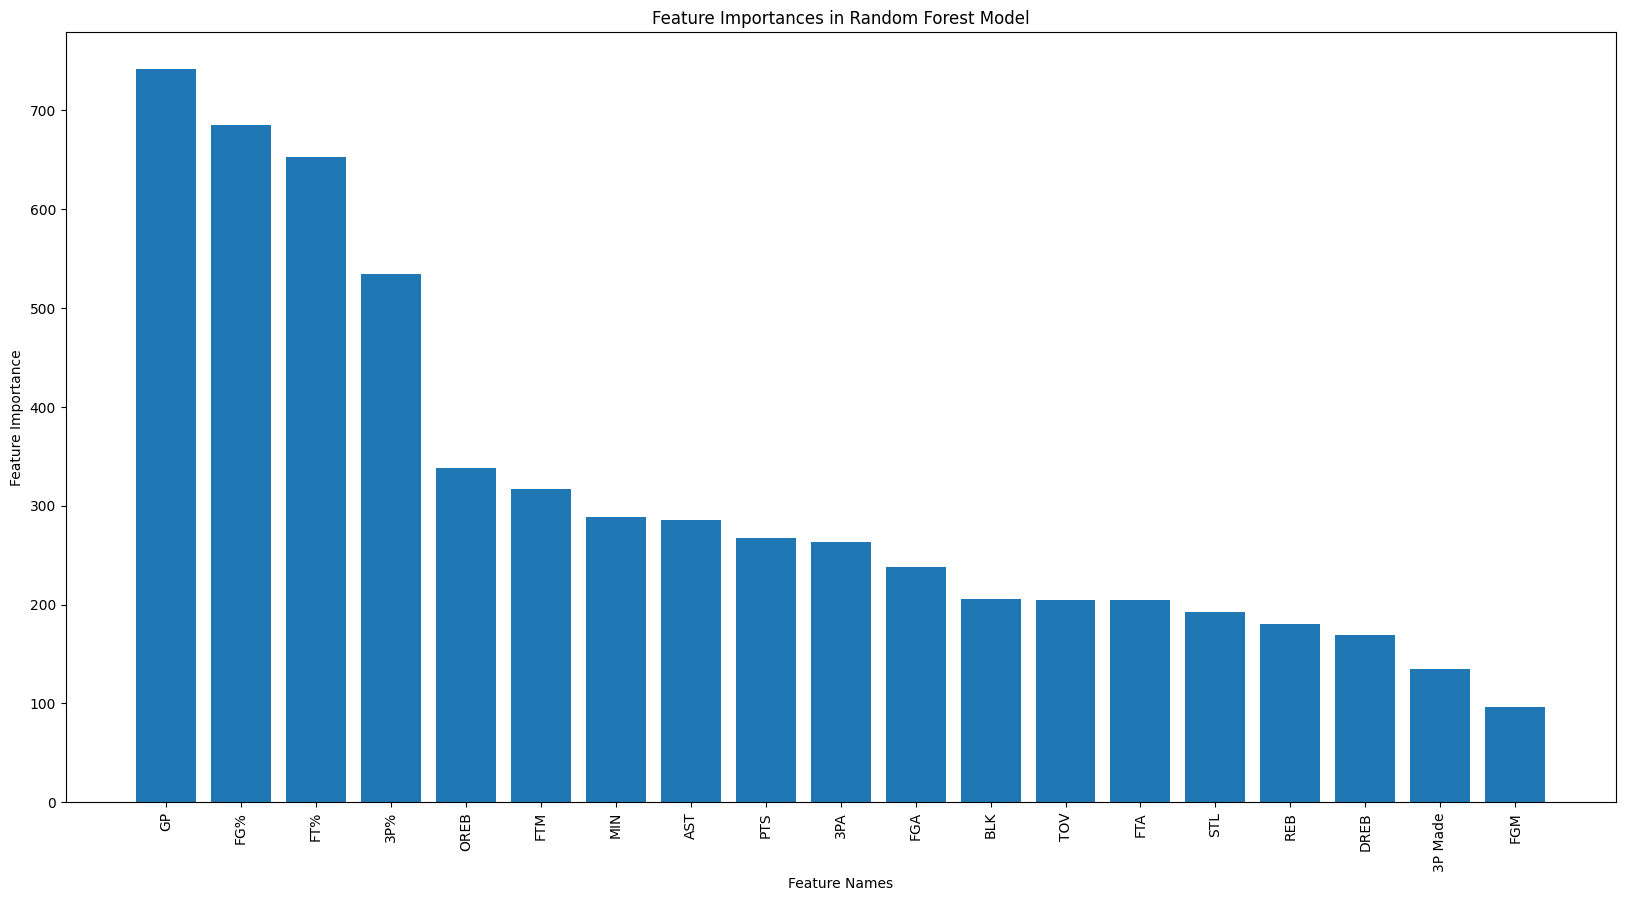

In [26]:
importances, feature_names = zip(*importances_with_features)

# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(importances)), importances, align='center')
plt.xticks(np.arange(len(importances)), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()

### Using Shap to explain model

In [31]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(sorted_results[0]['best_model'].named_steps['model'])
shap_values = explainer.shap_values(X_test)

#### effect of all features

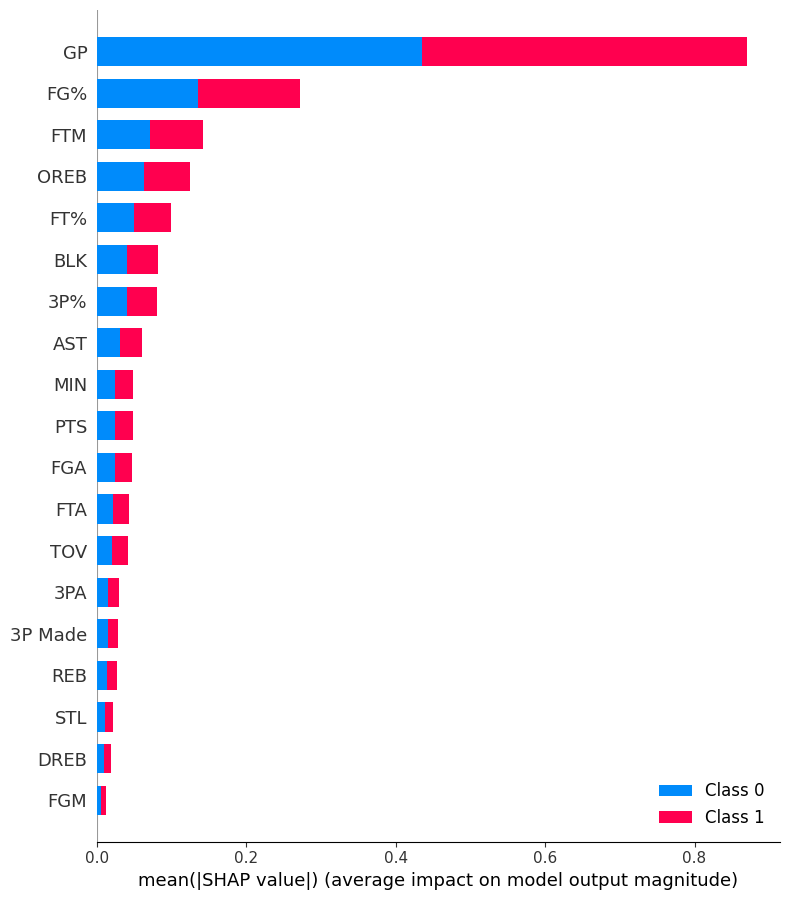

In [32]:
# summarize the effects of all the features
shap.summary_plot(shap_values,X_test,plot_type="bar")

#### Partial dependence plot

Using PDP we can see when the number of appearances in the first season exceeds 70, the probability of the player still being in the league five years later greatly increases.

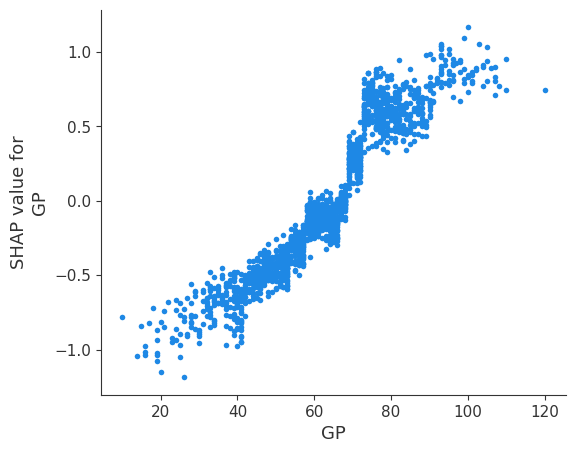

In [36]:
shap.dependence_plot('GP', shap_values[1], X_test, interaction_index=None)

## 6. Prediction

Finally we applied the trained model on test data and upload our result to obtain score

### Load test data

In [38]:
#Load the dataset
df_test = pd.read_csv("data/raw/nba_test.csv")
df_test = df_test.set_index(['Id'])

### Load the model

In [39]:
import joblib

# Load the model from the file 
model = joblib.load('models/lightgbm.joblib') 

### Obtain predict value

In [40]:
# prediction
y_label = model.predict(df_test)
y_score = model.predict_proba(df_test)[:, 1]

In [41]:
y_score

array([0.72034055, 0.84828461, 0.93292032, ..., 0.79272052, 0.9084391 ,
       0.82484884])

## 7. Push changes

**[7.1]** Add the changes to git staging area

In [ ]:
git add .

**[7.2]** Create the snapshot of the repository and add a description

In [ ]:
git commit -m "Ensemble methods and MLP"

**[7.3]** Push snapshot to Github

In [ ]:
git push --set-upstream origin third_experiment

**[7.4]** Check out to the branch

In [ ]:
git checkout third_experiment

**[7.5]** Pull the latest updates

In [ ]:
git pull

**[7.6]** Stop the Docker container

In [ ]:
docker stop adv_dsi_ass_1

## Reference

So, A. (2023). 36114_AdvDSI_Lab2_Exercise3_Solutions. https://drive.google.com/file/d/17UpMxkj4slAQ2BDyAeNEYzUfTA9Ww3x6/view